# Titanic Project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have null values in Age, cabin and Embarked category.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Lets treat the null values in columns which have NaN values with mean, median,mode method 

In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

To replace the missing value in Age we will check how Age is distributed, so we can use mean or median method to replace the NaN values

<AxesSubplot:xlabel='Age', ylabel='Density'>

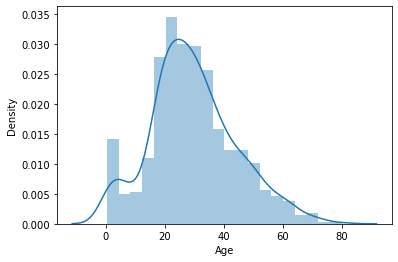

In [10]:
sns.distplot(df['Age'])

Age is close to normal distribution. Hence we will use the mean method to replace NaN values.

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
F2             3
              ..
C110           1
A36            1
D9             1
B86            1
C111           1
Name: Cabin, Length: 147, dtype: int64

Cabin has maximum Null values. It cannot be ignored as the location of the cabin may have been important for survival.

The Cabin in the dataset starts with alphabet and it ranges from A-F. So I will replace all the NaN values with G.

In [13]:
df['Cabin'] = df['Cabin'].fillna('G')

In [15]:
df['Cabin'] = df['Cabin'].astype(str).str[:1]

In [16]:
df['Cabin'].value_counts()

G    691
C     59
B     47
D     33
E     32
A     15
F     13
T      1
Name: Cabin, dtype: int64

Now lets treat the 0 value in the Fare.

In [17]:
df[df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,G,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,G,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,G,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,G,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,G,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,G,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,G,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,G,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,G,S


We can see that Fare with the 0 values has Embarked from S and only Cabin A, B and G has the 0 value.

We will replace the same with mean of Cabin and Embarkation point.

In [18]:
df[(df["Cabin"] == 'A' )& (df['Embarked']=='S')].mean()

PassengerId    465.375000
Survived         0.375000
Pclass           1.000000
Age             33.887169
SibSp            0.000000
Parch            0.250000
Fare            40.731763
dtype: float64

The mean of Cabin A with the Embarkation point S is 40.73. Hence we will replace the o with 40.73

In [19]:
df.loc[(df["Cabin"] == 'A' )& (df['Fare']==0), 'Fare']=40.73

In [20]:
df[(df["Cabin"] == 'B' )& (df['Embarked']=='S')].mean()

PassengerId    613.320000
Survived         0.720000
Pclass           1.000000
Age             34.307965
SibSp            0.360000
Parch            0.560000
Fare            84.942500
dtype: float64

The mean of Cabin A with the Embarkation point S is 84.94. Hence we will replace the o with 84.94

In [22]:
df.loc[(df["Cabin"] == 'B' )& (df['Fare']==0), 'Fare']=84.94

In [23]:
df[df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,G,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,G,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,G,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,G,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,G,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,G,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,G,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,G,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,G,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,29.699118,0,0,239856,0.0,G,S


In [24]:
df[(df["Cabin"] == 'G' )& (df['Embarked']=='S')].mean()

PassengerId    444.709056
Survived         0.267823
Pclass           2.628131
Age             28.212258
SibSp            0.603083
Parch            0.402697
Fare            17.968985
dtype: float64

The mean of Cabin A with the Embarkation point S is 17.96. Hence we will replace the o with 17.96

In [25]:
df.loc[(df["Cabin"] == 'G' )& (df['Fare']==0), 'Fare']=17.96

In [26]:
df[df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There is no O Fare Value now 

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.682468
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.606405
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,15.100000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Both Parch and SibSp are related to Family members travelling. Lets Join this group and create a new column as Family member

In [28]:
df['FamilySize'] = df.SibSp + df.Parch + 1

In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,G,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,G,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,1


In [30]:
df['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
3101295     6
347088      6
           ..
2623        1
3474        1
345779      1
PC 17605    1
2628        1
Name: Ticket, Length: 681, dtype: int64

We will now drop the columns which are not relevant for the model building.

PassengerId as it is a unique value assign to each passenger and hence no relevance.
Ticket again seems to be unique number assign to passengers or group travelling together
Name again has a unique value and will have no relevance for model fitting
Since I have joined the SibSp and Parch column as Family size. I will drop the both this column as well.

In [31]:
df.drop(['PassengerId','SibSp','Parch','Ticket','Name'],axis=1,inplace=True)

In [32]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.000000,7.2500,G,S,2
1,1,1,female,38.000000,71.2833,C,C,2
2,1,3,female,26.000000,7.9250,G,S,1
3,1,1,female,35.000000,53.1000,C,S,2
4,0,3,male,35.000000,8.0500,G,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,G,S,1
887,1,1,female,19.000000,30.0000,B,S,1
888,0,3,female,29.699118,23.4500,G,S,4
889,1,1,male,26.000000,30.0000,C,C,1


# EDA

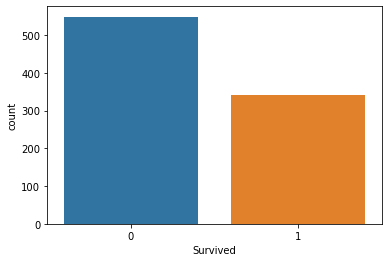

In [33]:
sns.countplot(df.Survived)
plt.show()

Here 0 are the deceased and 1 are the survived not many have survived 

Lets look at some features maybe related to survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

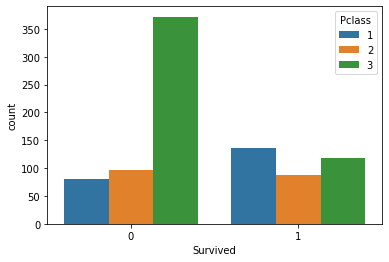

In [34]:
sns.countplot(x="Survived",hue='Pclass',data=df)

From above we can understand that Passenger from P class 1 has more chance of survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

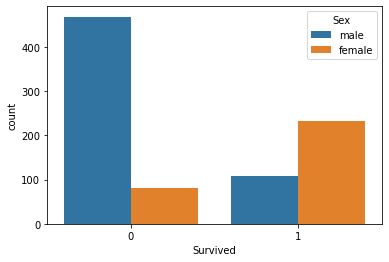

In [35]:
sns.countplot(x="Survived",hue='Sex',data=df)

As compared to male, Female has more chance of survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

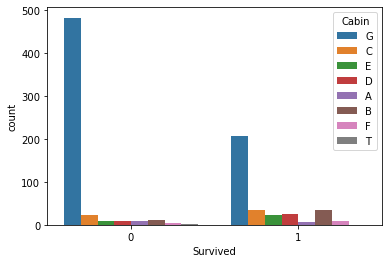

In [36]:
sns.countplot(x="Survived",hue='Cabin',data=df)

Passenger in cabin G and C were badly affected.

<AxesSubplot:xlabel='Survived', ylabel='count'>

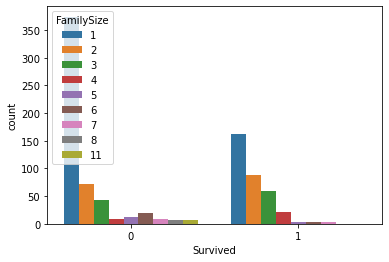

In [37]:
sns.countplot(x="Survived",hue='FamilySize',data=df)

A single person travelling alone has a less chance of surviving.

<AxesSubplot:xlabel='Survived', ylabel='count'>

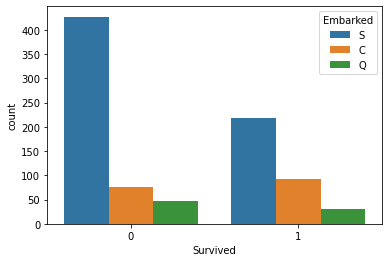

In [38]:
sns.countplot(x="Survived",hue='Embarked',data=df)

Since most of the passenger embarked from point S hence the data in inconclusive and its showing the one who survived, maximum number belong to Point S

<AxesSubplot:xlabel='Survived', ylabel='Age'>

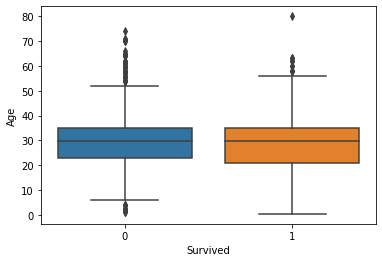

In [39]:
sns.boxplot(x='Survived', y='Age', data=df)

Younger passenger were able to survive the wreck.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

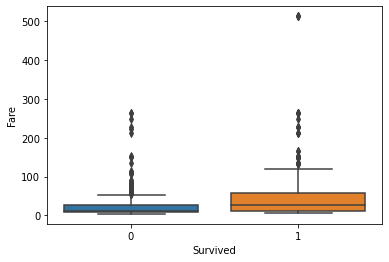

In [40]:
sns.boxplot(x='Survived', y='Fare', data=df)

Passenger who paid the higher fare are more likely to survive the wreck.

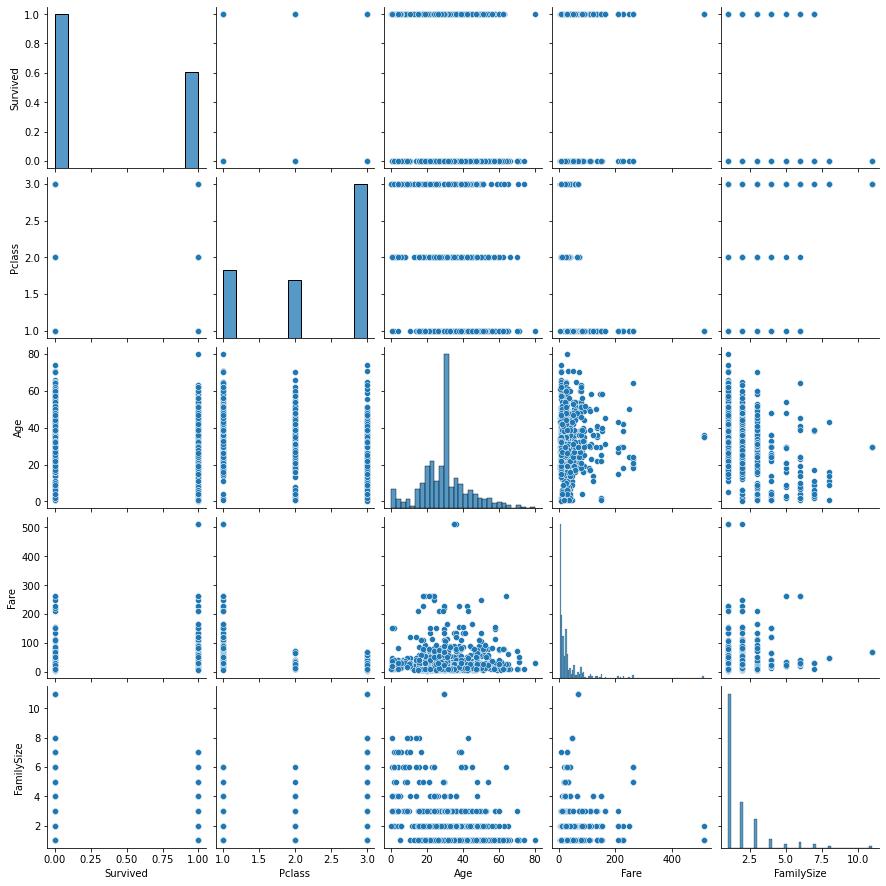

In [42]:
sns.pairplot(df)

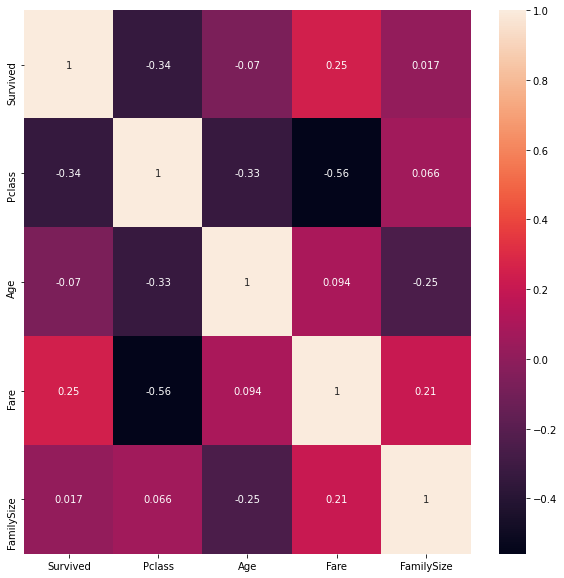

In [44]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Survived is most co related with P class and Fare.

Passenger with Pclass 1 and who paid the highest fare surived the wreck.

In [45]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.000000,7.2500,G,S,2
1,1,1,female,38.000000,71.2833,C,C,2
2,1,3,female,26.000000,7.9250,G,S,1
3,1,1,female,35.000000,53.1000,C,S,2
4,0,3,male,35.000000,8.0500,G,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,G,S,1
887,1,1,female,19.000000,30.0000,B,S,1
888,0,3,female,29.699118,23.4500,G,S,4
889,1,1,male,26.000000,30.0000,C,C,1


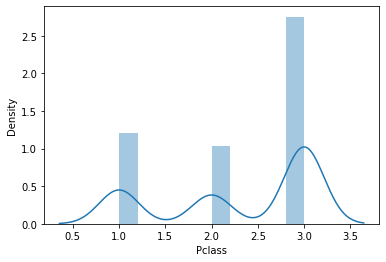

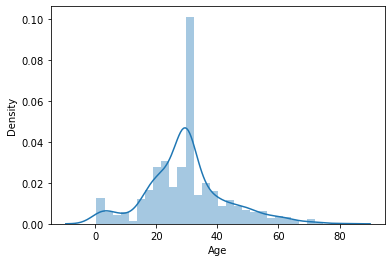

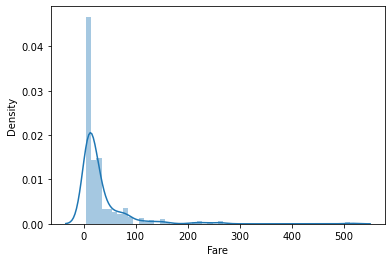

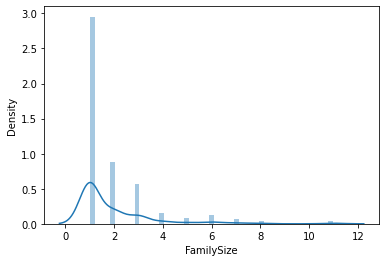

In [46]:
columns=['Pclass','Age','Fare','FamilySize']

for i in columns:
    sns.distplot(df[i])
    plt.show()

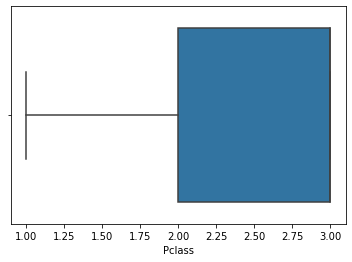

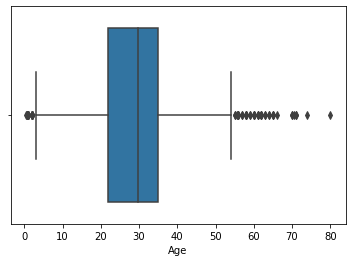

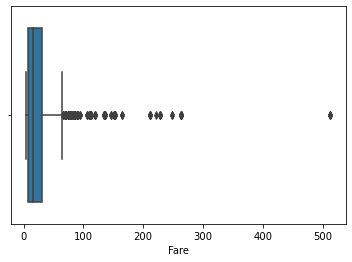

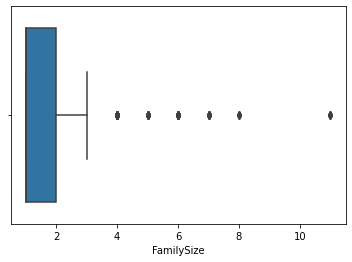

In [47]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

Outliers are present, we will need to correct it.

In [48]:
df[df["Fare"] > 300]

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
258,1,1,female,35.0,512.3292,G,C,1
679,1,1,male,36.0,512.3292,B,C,2
737,1,1,male,35.0,512.3292,B,C,1


In [49]:
df[df["Fare"] > 260]

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
27,0,1,male,19.0,263.0000,C,S,6
88,1,1,female,23.0,263.0000,C,S,6
258,1,1,female,35.0,512.3292,G,C,1
311,1,1,female,18.0,262.3750,B,C,5
341,1,1,female,24.0,263.0000,C,S,6
438,0,1,male,64.0,263.0000,C,S,6
679,1,1,male,36.0,512.3292,B,C,2
737,1,1,male,35.0,512.3292,B,C,1
742,1,1,female,21.0,262.3750,B,C,5


We can see that after fare 263 there is huge gap and next highest is 512.32. We can correct that by changing the values to 263

In [50]:
df.loc[(df["Embarked"] == 'C' )& (df['Fare']==512.3292), 'Fare']=263

In [51]:
df[df["Fare"] > 260]

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
27,0,1,male,19.0,263.000,C,S,6
88,1,1,female,23.0,263.000,C,S,6
258,1,1,female,35.0,263.000,G,C,1
311,1,1,female,18.0,262.375,B,C,5
341,1,1,female,24.0,263.000,C,S,6
438,0,1,male,64.0,263.000,C,S,6
679,1,1,male,36.0,263.000,B,C,2
737,1,1,male,35.0,263.000,B,C,1
742,1,1,female,21.0,262.375,B,C,5


Lets check for skewness

In [52]:
df.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.434488
Fare          3.207113
FamilySize    2.727441
dtype: float64

We will apply power transformation method to remove the skewness

In [54]:
from sklearn.preprocessing import power_transform


Power transform will not worked on categrical data. Hence we will seperate the categorical data then will run only on the numberical data.

To proceed further lets make the copy first

In [55]:
df_new=df.copy()

In [56]:
df_new

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.000000,7.2500,G,S,2
1,1,1,female,38.000000,71.2833,C,C,2
2,1,3,female,26.000000,7.9250,G,S,1
3,1,1,female,35.000000,53.1000,C,S,2
4,0,3,male,35.000000,8.0500,G,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,G,S,1
887,1,1,female,19.000000,30.0000,B,S,1
888,0,3,female,29.699118,23.4500,G,S,4
889,1,1,male,26.000000,30.0000,C,C,1


Now we will drop the columns where we will not run the power transform

In [58]:
df.drop(['Survived','Age'],axis=1,inplace=True)

In [59]:
df.drop(['Sex','Cabin','Embarked'],axis=1,inplace=True)

Applying power transform and creating the new DataFrame df2

In [60]:
df2=power_transform(df)

In [61]:
df2=pd.DataFrame(data=df2,columns=df.columns)

In [62]:
df2

,Pclass,Fare,FamilySize
0,0.863973,-1.236285,0.836696
1,-1.459129,1.387603,0.836696
2,0.863973,-1.074027,-0.791007
3,-1.459129,1.195269,0.836696
4,0.863973,-1.046082,-0.791007
...,...,...,...
886,-0.592604,-0.273307,-0.791007
887,-1.459129,0.723035,-0.791007
888,0.863973,0.471332,1.558215
889,-1.459129,0.723035,-0.791007


In [63]:
df2.skew()

Pclass       -0.441438
Fare          0.225711
FamilySize    0.576605
dtype: float64

Skewness is removed, now lets add the column back from the copy we have created

In [64]:
df2['Survived']=df_new['Survived']
df2['Age']=df_new['Age']
df2['Sex']=df_new['Sex']
df2['Cabin']=df_new['Cabin']
df2['Embarked']=df_new['Embarked']

In [65]:
df2

,Pclass,Fare,FamilySize,Survived,Age,Sex,Cabin,Embarked
0,0.863973,-1.236285,0.836696,0,22.000000,male,G,S
1,-1.459129,1.387603,0.836696,1,38.000000,female,C,C
2,0.863973,-1.074027,-0.791007,1,26.000000,female,G,S
3,-1.459129,1.195269,0.836696,1,35.000000,female,C,S
4,0.863973,-1.046082,-0.791007,0,35.000000,male,G,S
...,...,...,...,...,...,...,...,...
886,-0.592604,-0.273307,-0.791007,0,27.000000,male,G,S
887,-1.459129,0.723035,-0.791007,1,19.000000,female,B,S
888,0.863973,0.471332,1.558215,0,29.699118,female,G,S
889,-1.459129,0.723035,-0.791007,1,26.000000,male,C,C


In [66]:
df2.skew()

Pclass       -0.441438
Fare          0.225711
FamilySize    0.576605
Survived      0.478523
Age           0.434488
dtype: float64

Lets create the instance for Object data type. We will use the same for changing the categorical data to numerical.

In [70]:
from sklearn.preprocessing import LabelEncoder
Object=['Sex','Cabin','Embarked']

In [71]:
le=LabelEncoder()

for i in Object:
    df2[i]=le.fit_transform(df2[i])

In [72]:
df2

,Pclass,Fare,FamilySize,Survived,Age,Sex,Cabin,Embarked
0,0.863973,-1.236285,0.836696,0,22.000000,1,6,2
1,-1.459129,1.387603,0.836696,1,38.000000,0,2,0
2,0.863973,-1.074027,-0.791007,1,26.000000,0,6,2
3,-1.459129,1.195269,0.836696,1,35.000000,0,2,2
4,0.863973,-1.046082,-0.791007,0,35.000000,1,6,2
...,...,...,...,...,...,...,...,...
886,-0.592604,-0.273307,-0.791007,0,27.000000,1,6,2
887,-1.459129,0.723035,-0.791007,1,19.000000,0,1,2
888,0.863973,0.471332,1.558215,0,29.699118,0,6,2
889,-1.459129,0.723035,-0.791007,1,26.000000,1,2,0


In [73]:
df_x=df2.drop(columns='Survived')
y=df2['Survived']

In [75]:

df_x

,Pclass,Fare,FamilySize,Age,Sex,Cabin,Embarked
0,0.863973,-1.236285,0.836696,22.000000,1,6,2
1,-1.459129,1.387603,0.836696,38.000000,0,2,0
2,0.863973,-1.074027,-0.791007,26.000000,0,6,2
3,-1.459129,1.195269,0.836696,35.000000,0,2,2
4,0.863973,-1.046082,-0.791007,35.000000,1,6,2
...,...,...,...,...,...,...,...
886,-0.592604,-0.273307,-0.791007,27.000000,1,6,2
887,-1.459129,0.723035,-0.791007,19.000000,0,1,2
888,0.863973,0.471332,1.558215,29.699118,0,6,2
889,-1.459129,0.723035,-0.791007,26.000000,1,2,0


Now we will standardize our data.

We wil be using StandardScaler for the same.

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(df_x)

In [77]:
x=sc_x
x=pd.DataFrame(x,columns=df_x.columns)

In [78]:
x

,Pclass,Fare,FamilySize,Age,Sex,Cabin,Embarked
0,0.863973,-1.236285,0.836696,-0.592481,0.737695,0.494124,0.585954
1,-1.459129,1.387603,0.836696,0.638789,-1.355574,-1.898619,-1.942303
2,0.863973,-1.074027,-0.791007,-0.284663,-1.355574,0.494124,0.585954
3,-1.459129,1.195269,0.836696,0.407926,-1.355574,-1.898619,0.585954
4,0.863973,-1.046082,-0.791007,0.407926,0.737695,0.494124,0.585954
...,...,...,...,...,...,...,...
886,-0.592604,-0.273307,-0.791007,-0.207709,0.737695,0.494124,0.585954
887,-1.459129,0.723035,-0.791007,-0.823344,-1.355574,-2.496804,0.585954
888,0.863973,0.471332,1.558215,0.000000,-1.355574,0.494124,0.585954
889,-1.459129,0.723035,-0.791007,-0.284663,0.737695,-1.898619,-1.942303


Now we will move forward for model fitting

# ML Model Fitting and Selection

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [81]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8432835820895522  on Random state 133


We can see that the best random state is 133. We will split the data with this random state

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=133)

We will train and test the data using different classification Model

In [83]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
gnb=GaussianNB()
ad=AdaBoostClassifier(n_estimators=100)

In [84]:
model=(lg,sv,knn,rfc,dt,gnb,ad)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8432835820895522
[[152  19]
 [ 23  74]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       171
           1       0.80      0.76      0.78        97

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8171641791044776
[[161  10]
 [ 39  58]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       171
           1       0.85      0.60      0.70        97

    accuracy                           0.82       268
   macro avg       0.83      0.77      0.79       268
weighted avg       0.82      0.82      0.81       268

-------------------------------------------------------------------------------------------

We have got the score for all the above models. Logistic regression has given us the best accuracy

# Cross Validation

We will check the CV score using Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score

for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7957441466323522
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8069612704789405
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.8182160567447117
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8092461239093591
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7811813445483649
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7419433808298286
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8047642960266147
-------------------------------------------------------------------------------


RFC has given us the least score difference between test accuracy and Cross validation followed by KNN.

We will check the ROC_AUC score to pick the final model

# ROC_AUC score

AUC Score of LogisticRegression()
0.8258877434135165




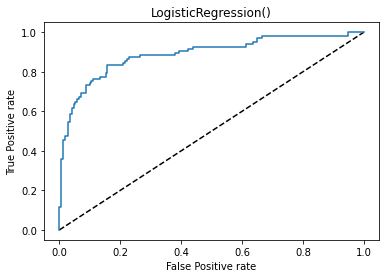



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.7697293060830771




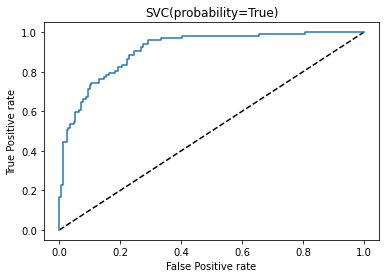



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.7884186411044793




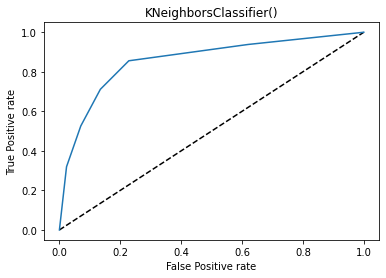



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.8143425574244891




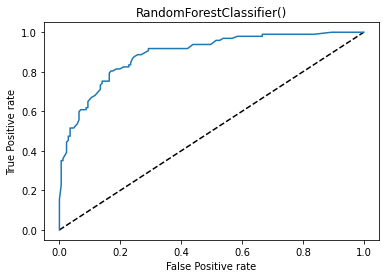



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.7864894194248508




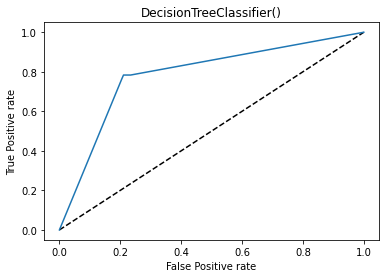



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.77018146741424




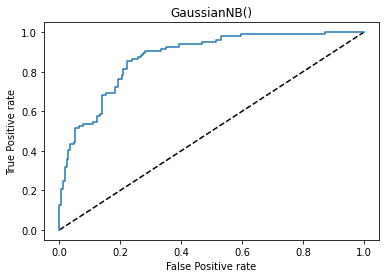



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.8061132211973232




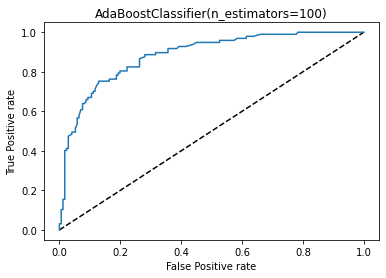



------------------------------------------------------------------------


In [87]:
from sklearn.metrics import roc_curve,roc_auc_score

for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

We will now compare all our metrics score to determine the best fitting model

In [89]:
Performance={'Model':['LogisticRegression','SVC','KNN','RFC','DTC','GNB','ADC'],
            'Test_Accuracy':[84,82,81,81,78,78,82],
            'Cross_val_score':[79,80,81,81,77,74,80],
            'Diffeerence':[84-79,82-80,81-81,81-81,78-77,78-74,82-80],
            'ROC_AUC_score':[82,76,78,80,77,77,80]}

In [90]:
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test_Accuracy,Cross_val_score,Diffeerence,ROC_AUC_score
0,LogisticRegression,84,79,5,82
1,SVC,82,80,2,76
2,KNN,81,81,0,78
3,RFC,81,81,0,80
4,DTC,78,77,1,77
5,GNB,78,74,4,77
6,ADC,82,80,2,80


After checking the above metrics we can confirm that RandomForest Classifier has performed well with Test accuracy of 81%, Croass val score of 81% as well and ROC_AUC score of 80%


# HyperTuning of the Model

In [91]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,250,500],'criterion':['gini','entropy'],'max_depth':np.arange(2,10)}

In [92]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

Fitting our best model for HyperTuning

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 250, 500]})

In [95]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 250}

In [97]:
Finalmod=RandomForestClassifier(criterion='entropy', max_depth= 6, n_estimators= 250)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.95522388059702


There has been an increase in the perfomance of the model by 3% 

In [98]:
import joblib
joblib.dump(Finalmod,'titanic_model.obj')

['titanic_model.obj']